In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Now you can access files on your Google Drive
data_dir = '/content/drive/...'

Mounted at /content/drive


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
#data Agumentation
Traning_Datagenarator=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1
    )


In [36]:
#trainig data
Train_Data=Traning_Datagenarator.flow_from_directory('/content/drive/...',
                                                     target_size=(256,256),
                                                     color_mode='rgb',
                                                     class_mode='binary',
                                                     batch_size=16,
                                                     subset='training')

#validating data
Validation_Data=Traning_Datagenarator.flow_from_directory('/content/drive/...',
                                                     target_size=(256,256),
                                                     color_mode='rgb',
                                                     class_mode='binary',
                                                     batch_size=16,
                                                     subset='validation')

Found 590 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [37]:
#initializng cnn
CNN=tf.keras.models.Sequential()

In [38]:
#firstlayer
CNN.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
#fattening
CNN.add(tf.keras.layers.Flatten())

#fullyconnected layer
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))

#output layer
CNN.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [40]:
CNN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 524288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      67,108,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,110,017 (256.00 MB)

 Trainable params: 67,110,017 (256.00 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/...',
                                              monitor='val_loss',
                                              mode='min',
                                              save_best_only=True)

callbacks=[checkpoint]

In [43]:
#train CNN model
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

CNN.fit(Train_Data,validation_data=Validation_Data,
        epochs=3,steps_per_epoch=Train_Data.samples//16,
        validation_steps=Validation_Data.samples//16,
        callbacks=callbacks)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.7855 - loss: 10.3387 - val_accuracy: 0.7656 - val_loss: 0.6064
Epoch 2/3
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1:43 3s/step - accuracy: 0.9375 - loss: 0.1925

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9375 - loss: 0.1925 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.8422 - loss: 0.5810 - val_accuracy: 0.8438 - val_loss: 0.5237


In [22]:
#test
from tensorflow.keras.preprocessing import image
import numpy as np

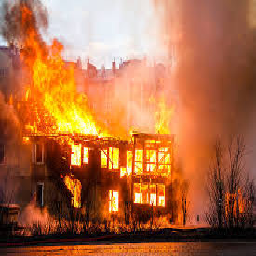

In [34]:
Test_image=image.load_img('/content/drive/...',target_size=(256,256))
Test_image

In [31]:
Test_image=image.img_to_array(Test_image)
Test_image=Test_image//255
Test_image=np.expand_dims(Test_image,axis=0)


In [33]:
result=CNN.predict(Test_image)
print(result[0][0])
predicted_class = (result > 0.5).astype("int32")  # Convert to binary class (for binary classification)
print(predicted_class)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
0.00039076703
[[0]]
